In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [277]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST00001,Male,0,No,Yes,3.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,68.61,205.83,Yes
1,CUST00002,Male,1,Yes,No,2.0,Yes,Yes,DSL,No,...,No internet service,Yes,NaN,No,One year,Yes,Bank transfer (automatic),23.15,46.3,No
2,CUST00003,Female,No,No,No,42.0,Yes,Yes,DSL,No,...,No,NaN,Yes,Yes,Month-to-month,No,Electronic check,42.63,1790.46,Yes
3,CUST00004,Female,0,No,Yes,40.0,Yes,Yes,Fiber optic,No,...,Yes,No,No,No internet service,Month-to-month,No,Electronic check,75.04,3001.6,No
4,CUST00005,Male,Yes,Yes,Yes,17.0,Yes,NaN,Fiber optic,Yes,...,Yes,No,No internet service,No,Two year,Yes,Electronic check,22.38,380.46,Yes


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        70000 non-null  object 
 1   gender            69252 non-null  object 
 2   SeniorCitizen     69341 non-null  object 
 3   Partner           66470 non-null  object 
 4   Dependents        66435 non-null  object 
 5   tenure            69433 non-null  float64
 6   PhoneService      70000 non-null  object 
 7   MultipleLines     68132 non-null  object 
 8   InternetService   70000 non-null  object 
 9   OnlineSecurity    67078 non-null  object 
 10  OnlineBackup      67253 non-null  object 
 11  DeviceProtection  67106 non-null  object 
 12  TechSupport       67267 non-null  object 
 13  StreamingTV       67173 non-null  object 
 14  StreamingMovies   67215 non-null  object 
 15  Contract          70000 non-null  object 
 16  PaperlessBilling  70000 non-null  object

In [279]:
df.describe()

,tenure,MonthlyCharges
count,69433.000000,69612.000000
mean,30.516858,60.588548
std,89.873767,111.509588
min,-10.000000,18.000000
25%,10.000000,29.670000
50%,20.000000,41.190000
75%,35.000000,63.882500
max,999.000000,1499.770000


In [280]:
df.isnull().sum()


customerID             0
gender               748
SeniorCitizen        659
Partner             3530
Dependents          3565
tenure               567
PhoneService           0
MultipleLines       1868
InternetService        0
OnlineSecurity      2922
OnlineBackup        2747
DeviceProtection    2894
TechSupport         2733
StreamingTV         2827
StreamingMovies     2785
Contract               0
PaperlessBilling       0
PaymentMethod       3569
MonthlyCharges       388
TotalCharges        1062
Churn                  0
dtype: int64

In [281]:
print("Missing values BEFORE cleaning:\n")
print(df.isnull().sum())


Missing values BEFORE cleaning:

customerID             0
gender               748
SeniorCitizen        659
Partner             3530
Dependents          3565
tenure               567
PhoneService           0
MultipleLines       1868
InternetService        0
OnlineSecurity      2922
OnlineBackup        2747
DeviceProtection    2894
TechSupport         2733
StreamingTV         2827
StreamingMovies     2785
Contract               0
PaperlessBilling       0
PaymentMethod       3569
MonthlyCharges       388
TotalCharges        1062
Churn                  0
dtype: int64


In [282]:
# tenure
print("Missing tenure before:", df['tenure'].isnull().sum())
df['tenure'] = df['tenure'].fillna(df['tenure'].median())
print("Missing tenure after:", df['tenure'].isnull().sum())

# MonthlyCharges
print("\nMissing MonthlyCharges before:", df['MonthlyCharges'].isnull().sum())
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].median())
print("Missing MonthlyCharges after:", df['MonthlyCharges'].isnull().sum())



Missing tenure before: 567
Missing tenure after: 0

Missing MonthlyCharges before: 388
Missing MonthlyCharges after: 0


In [283]:
# Check datatype
print(df['TotalCharges'].dtype)

# Convert to numeric (force errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


object


In [284]:
print("Missing TotalCharges before:", df['TotalCharges'].isnull().sum())

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

print("Missing TotalCharges after:", df['TotalCharges'].isnull().sum())


Missing TotalCharges before: 4474
Missing TotalCharges after: 0


In [285]:
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaymentMethod'
]

for col in categorical_cols:
    print(f"\nMissing {col} before:", df[col].isnull().sum())
    df[col] = df[col].fillna(df[col].mode()[0])
    print(f"Missing {col} after:", df[col].isnull().sum())



Missing gender before: 748
Missing gender after: 0

Missing SeniorCitizen before: 659
Missing SeniorCitizen after: 0

Missing Partner before: 3530
Missing Partner after: 0

Missing Dependents before: 3565
Missing Dependents after: 0

Missing MultipleLines before: 1868
Missing MultipleLines after: 0

Missing OnlineSecurity before: 2922
Missing OnlineSecurity after: 0

Missing OnlineBackup before: 2747
Missing OnlineBackup after: 0

Missing DeviceProtection before: 2894
Missing DeviceProtection after: 0

Missing TechSupport before: 2733
Missing TechSupport after: 0

Missing StreamingTV before: 2827
Missing StreamingTV after: 0

Missing StreamingMovies before: 2785
Missing StreamingMovies after: 0

Missing PaymentMethod before: 3569
Missing PaymentMethod after: 0


In [286]:
print("\nMissing values AFTER cleaning:\n")
print(df.isnull().sum())



Missing values AFTER cleaning:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [287]:
df.dropna(inplace=True)


In [288]:
print("Duplicates before:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("Duplicates after:", df.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


In [289]:
print("Before fixing Gender:")
print(df['gender'].value_counts())

df.loc[:, 'gender'] = df['gender'].str.lower().replace({
    'm': 'male',
    'f': 'female'
})

print("\nAfter fixing Gender:")
print(df['gender'].value_counts())


Before fixing Gender:
gender
Female    34858
Male      33252
Man         500
male        374
FEMALE      351
m           339
f           326
Name: count, dtype: int64

After fixing Gender:
gender
female    35535
male      33965
man         500
Name: count, dtype: int64


In [290]:
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Before removing outliers:")
print(df['TotalCharges'].describe())

df = df[(df['TotalCharges'] >= lower) & (df['TotalCharges'] <= upper)]

print("\nAfter removing outliers:")
print(df['TotalCharges'].describe())


Before removing outliers:
count    7.000000e+04
mean     1.744682e+03
std      9.467766e+03
min     -9.912000e+01
25%      4.059900e+02
50%      8.209700e+02
75%      1.471763e+03
max      1.244434e+06
Name: TotalCharges, dtype: float64

After removing outliers:
count    64863.000000
mean       899.762259
std        678.539442
min        -99.120000
25%        374.700000
50%        810.810000
75%       1262.005000
max       3070.200000
Name: TotalCharges, dtype: float64


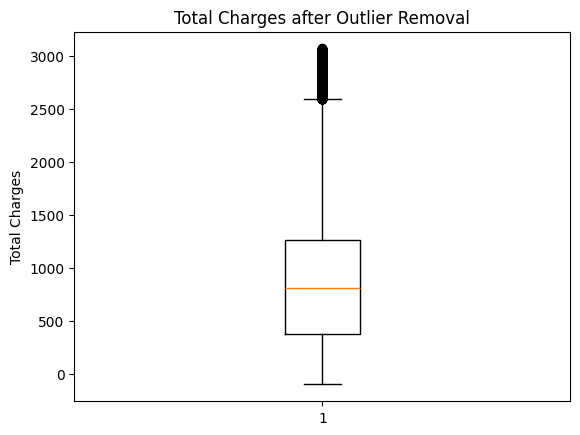

In [291]:
plt.figure()
plt.boxplot(df['TotalCharges'])
plt.title("Total Charges after Outlier Removal")
plt.ylabel("Total Charges")
plt.show()


In [292]:
df = pd.get_dummies(
    df,
    columns=[
        'gender','Partner','Dependents','PhoneService',
        'MultipleLines','InternetService','OnlineSecurity',
        'OnlineBackup','DeviceProtection','TechSupport',
        'StreamingTV','StreamingMovies','Contract',
        'PaperlessBilling','PaymentMethod'
    ],
    drop_first=True
)

df.head()


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_male,gender_man,Partner_Yes,Dependents_Yes,...,StreamingMovies_Y,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,CUST00001,0,3.0,68.61,205.83,Yes,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
1,CUST00002,1,2.0,23.15,46.30,No,True,False,True,False,...,False,False,False,True,False,True,True,False,False,False
2,CUST00003,No,42.0,42.63,1790.46,Yes,False,False,False,False,...,False,True,True,False,False,False,False,False,True,False
3,CUST00004,0,40.0,75.04,3001.60,No,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
4,CUST00005,Yes,17.0,22.38,380.46,Yes,True,False,True,True,...,False,False,False,False,True,True,False,False,True,False


In [293]:
df['SpendTenureRatio'] = df['TotalCharges'] / (df['tenure'] + 1)
df[['SpendTenureRatio']].head()


,SpendTenureRatio
0,51.457500
1,15.433333
2,41.638605
3,73.209756
4,21.136667


In [294]:
df.isnull().sum()



customerID                                 0
SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_male                                0
gender_man                                 0
Partner_Yes                                0
Dependents_Yes                             0
PhoneService_Yes                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No internet service         0
OnlineSecurity_True                        0
OnlineSecurity_Y                           0
OnlineSecurity_Yes                         0
OnlineBackup_No internet service           0
OnlineBackup_True                          0
OnlineBackup_Y                             0
OnlineBack

In [295]:
df.shape

(64863, 48)

In [296]:
df.to_csv("cleaned_customer_churn.csv", index=False)
